                                                                                                                 Iván Arcos

## Scraping iverify for Information on the Zambian Elections

This code uses the BeautifulSoup library to scrape information from the iverify website related to the Zambian elections. It reads the HTML content of a file called "iverify.txt" and searches for all the titles of the claims made by iverify. Then, for each title, it generates a new URL, sends a request to that URL, and extracts the claim, evidence, label, and verification date from the corresponding page using BeautifulSoup.

The extracted information is stored in four separate lists: claims, evidences, labels, and fechas. These lists can be used to create a pandas dataframe to analyze the iverify claims related to the Zambian elections. If any errors occur while scraping, the code prints an error message.

In [2]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd

with open("iverify.txt", encoding = "utf-8") as htmlcontent:
    iverify_html = htmlcontent.read()
    
bs = BeautifulSoup(iverify_html, "html")
all_titles_html = bs.find_all("h4")

def cleaning(string):
    return re.findall('\w+', string.replace(',', '').replace("’", '').replace("$", '').lower())
    
claims = []
evidences = []
labels = []
fechas = []

cont = 1
for title_htlm in all_titles_html:
    print(f"Analizando ({cont}/{len(all_titles_html)}): ", title_htlm.text)
    try:
        parse_title = '-'.join(cleaning(title_htlm.text))
        newspage = requests.get(f"https://iverify.org.zm/{parse_title}")
        bsnew = BeautifulSoup(newspage.content, "html")
        claim_find = bsnew.find("div", class_ = "entry-content--wrapper__claim").find("p").text
        evidences_find = bsnew.find("div", class_ = "entry-content--wrapper__rating-justification").find("p").text
        label_find = bsnew.find("div", class_ = "entry--header--data__cat__status").find("span").text.strip()
        fecha_find = bsnew.find("div", class_ = "entry--header--status__verified").find("span").text.strip()
        claims.append(claim_find)
        evidences.append(evidences_find)
        labels.append(label_find)
        fechas.append(fecha_find)
    except:
        print("Error scrapping")
    cont+=1

Analizando (1/213):  No.The Former President, Mr. Edgar Chagwa Lungu did not declare himself eligible for 2026 General Elections, the video clip was taken in 2021 during a memorial service.
Analizando (2/213):  Yes, Cyclone Freddy may affect Zambia, members of the public encouraged to take precaution or contact DMMU
Analizando (3/213):  No, the alleged Comprehensive Sexuality Education “book” circulating on social media is not genuine
Analizando (4/213):  No,  large scale mining has not started at the open pit mining Kangaluwi Project in Lower Zambezi
Analizando (5/213):  Yes, Mr. Chitamfya has joined ZESCO Limited but as Senior Manager-Corporate Affairs
Analizando (6/213):  No snake was found in Police cells while Kambwili was detained there, trending picture not genuine
Analizando (7/213):  No. Miles Sampa was suspended and not expelled from the Patriotic Front Party.
Analizando (8/213):  Statement on Catholic priests’ alleged rejection of Dr. Rev. Alick Banda not an authorship of th

Analizando (73/213):  HH is on firm ground on Order of the Eagle award.
Analizando (74/213):  Opposition leaders not barred from attending AU Indaba as claimed on PF page
Analizando (75/213):  Mr Alfred Nawa is still Southern Province top cop, contrary to claims he was “removed”
Analizando (76/213):  Former President Lungu never named President Hichilema as one of the people he said lied their way to power
Analizando (77/213):  No, Mr Kingsely Chanda is not the author of the circulating “analysis” of ZRA revenue and taxes
Error scrapping
Analizando (78/213):  No, President Hichilema did not meet Mr. Ndambo as purported by a picture circulating on social media
Analizando (79/213):  Yes, Former First Lady, Esther Lungu has admitted owning the 15 houses seized by DEC
Analizando (80/213):  Yes, Former First Lady, Esther Lungu has admitted owning the 15 houses seized by DEC
Analizando (81/213):  Yes, Government will distribute fertiliser to farmers through FISP but the number of bags is yet

Analizando (137/213):  No, President Hichilema was not scheduled to answer questions from MPs to mark 100 days in office
Analizando (138/213):  No evidence that those repainting Nathan Chanda’s Police Post were linked to a political party
Analizando (139/213):  No, President Hichilema has not abolished civil servants’ allowances.
Analizando (140/213):  Yes, Zambia is threatened to experience the fourth wave of Covid-19
Analizando (141/213):  Yes, the courts have nullified the election of Bowman Lusambo and Joe Malanji as Members of Parliament.
Analizando (142/213):  Yes, Kabwata Constituency Member of Parliament  Hon. Levy Mkandawire died on 18th November
Analizando (143/213):  No, Ms. Esther Katongo maintains her position as Deputy Commanding Officer for Lilayi police.
Analizando (144/213):  UPDATED: Kabwata Constituency MP Hon. Mkandawire died on 18th November, but initial reports of his death two weeks earlier were false
Error scrapping
Analizando (145/213):  No, the number of regis

**Exceptions**

In [3]:
news_exc = ['no-credence-in-claims-about-police-arresting-2500-people-for-failing-to-pay-zamcash-loans',
           'masala-market-gutted-cause-yet-to-be-established',
           'no-mr-kingsely-chanda-is-not-the-author-of-the-article-on-zrarevenue-and-taxes',
           'yes-hoisting-of-the-zambian-national-flag-at-undesignated-premises-without-written-permission-is-unconstitutional',
           'no-evidence-substantiates-media-reports-that-dr-kabungo-was-beaten-and-stamped-on-in-a-stampede-in-abuja-as-autopsy-report-indicates-that-the-zambian-caf-official-died-from-atherosclerosis-triggered',
            'no-the-demolition-of-mobile-money-booths-in-kabwe-was-not-done-by-upnd-but-was-a-combined-council-zambia-railways-and-police-operation-to-address-a-breach-of-the-railways-act-provisions-on-encroachm',
            'yes-fake-covid-19-vaccination-certificates-were-being-issued-govt-warned-health-personnel-and-the-public-against-the-practice',
            'yes-incidence-of-political-violence-recorded-on-poling-day-following-violent-campaigns-in-kaumbwe-ward',
            'yes-no-law-compels-anyone-to-display-a-presidential-portrait-in-business-or-office-premises',
            'the-police-acts-when-party-members-are-attacked-irrespective-of-the-party',
            'no-kabwata-constituency-mp-hon-mkandawire-is-alive',
           'youths-attack-motorists-in-kasangula-road',
            'upnd-blames-ecz-for-the-absence-of-upnd-representatives-in-dubai-to-observe-ballot-printing-2']

for parse_title in news_exc:
    print(f"Analizando: ", parse_title)
    try:
        newspage = requests.get(f"https://iverify.org.zm/{parse_title}")
        bsnew = BeautifulSoup(newspage.content, "html")
        claim_find = bsnew.find("div", class_ = "entry-content--wrapper__claim").find("p").text
        evidences_find = bsnew.find("div", class_ = "entry-content--wrapper__rating-justification").find("p").text
        label_find = bsnew.find("div", class_ = "entry--header--data__cat__status").find("span").text.strip()
        fecha_find = bsnew.find("div", class_ = "entry--header--status__verified").find("span").text.strip()
        claims.append(claim_find)
        evidences.append(evidences_find)
        labels.append(label_find)
        fechas.append(fecha_find)
    except:
        print("Error scrapping")

Analizando:  no-credence-in-claims-about-police-arresting-2500-people-for-failing-to-pay-zamcash-loans
Analizando:  masala-market-gutted-cause-yet-to-be-established
Analizando:  no-mr-kingsely-chanda-is-not-the-author-of-the-article-on-zrarevenue-and-taxes
Analizando:  yes-hoisting-of-the-zambian-national-flag-at-undesignated-premises-without-written-permission-is-unconstitutional
Error scrapping
Analizando:  no-evidence-substantiates-media-reports-that-dr-kabungo-was-beaten-and-stamped-on-in-a-stampede-in-abuja-as-autopsy-report-indicates-that-the-zambian-caf-official-died-from-atherosclerosis-triggered
Analizando:  no-the-demolition-of-mobile-money-booths-in-kabwe-was-not-done-by-upnd-but-was-a-combined-council-zambia-railways-and-police-operation-to-address-a-breach-of-the-railways-act-provisions-on-encroachm
Analizando:  yes-fake-covid-19-vaccination-certificates-were-being-issued-govt-warned-health-personnel-and-the-public-against-the-practice
Analizando:  yes-incidence-of-politic

In [32]:
df_iverify = pd.DataFrame(zip(claims, evidences, labels, fechas), columns = ["claims", "evidences", "label", "date"])
df_iverify.loc[df_iverify["label"] == "",:]

,claims,evidences,label,date
40,Smart Eagles among other social media pages po...,iVerify Zambia has determined as misleading th...,,"Sep, 20 2022"
41,"On September 17, 2022, among many other social...",iVerify Zambia has determined as false the cla...,,"Sep, 20 2022"
66,"On July 28, 2022, Prince Kaliza a Facebook blo...",iVerify Zambia has established as misleading t...,,"Jul, 30 2022"
67,\nUnited Party for National Development cadres...,iVerify Zambia’s fact-checking team has determ...,,"Jul, 30 2022"
84,Nkani Zambia facebook page published an articl...,The claim on the Nkani Zambia Facebook page it...,,"Jun, 02 2022"
86,"On 9th May 2022, online media houses published...",The claim that funds allocated for the constru...,,"May, 26 2022"
101,"On 4th March 2022, the Patriotic Front Faceboo...",The Fact-Checking Process has established as t...,,"Mar, 19 2022"


In [33]:
manual_labels = ['Misleading', 'False', 'Misleading', 'Misleading', 'Misleading', 'Unproven', 'True']
df_iverify.loc[df_iverify["label"] == "",'label'] = manual_labels

In [96]:
df_iverify.to_csv("iverifyzm.csv")

,claims,evidences,label,date
0,"On March 2, 2023, Koswe Facebook page publish...",The iVerify Zambia has determined as false the...,False,"Mar, 09 2023"
1,"On 22 February 2023, a Facebook page called Za...",iVerify has determined as true reports that Cy...,True,"Feb, 23 2023"
2,"On February 21, 2023, a Facebook page called K...",iVerify Zambia has determined as misleading th...,Misleading,"Feb, 23 2023"
3,"The Patriotic Front (PF) Facebook page, on Jan...",iVerify Zambia has determined as false the cla...,False,"Feb, 22 2023"
4,"On Wednesday, February 17, 2023, Grindstone Te...",iVerify Zambia has determined as misleading th...,Misleading,"Feb, 18 2023"
...,...,...,...,...
206,"On 13th October, 2021, The Candidates uploaded...",The Fact Checking process has determined as tr...,True,"Oct, 20 2021"
207,"On 28th July 2021, News Diggers Newspaper publ...",The fact checking process has determined as mi...,Misleading,"Aug, 04 2021"
208,The Patriotic Front (PF) Facebook Page publish...,The Fact Checking Process has determined as fa...,False,"Nov, 12 2021"
209,"On 12th July, 2021, the Smart Eagles Facebook ...",The fact checking process has determined the c...,Partly False,"Jul, 20 2021"


**Distribution of Labels in the Dataset**

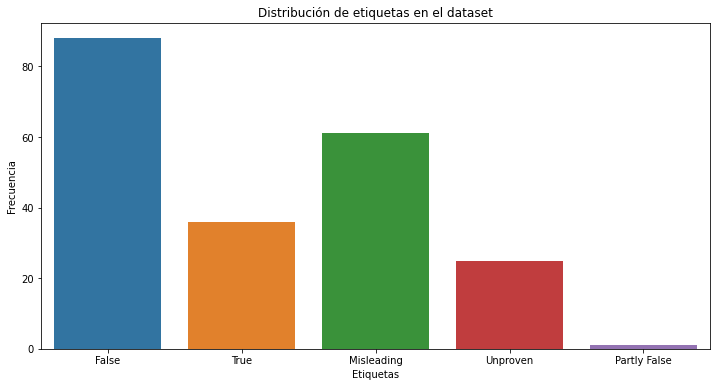

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12,6))  
sns.countplot(data=df_iverify, x="label")
plt.title("Distribución de etiquetas en el dataset")
plt.xlabel("Etiquetas")
plt.ylabel("Frecuencia")
plt.show()

In [35]:
from sentence_transformers import SentenceTransformer

sentences = ["donkey", "horse"]
model = SentenceTransformer('mitra-mir/setfit-model-Feb11-Misinformation-on-Media-Traditional-Social')
embeddings = model.encode(sentences)
print(embeddings)

C:\Users\Usuario\anaconda3\envs\R\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[ 0.00263865  0.1763291   0.01384957 ...  0.0269373  -0.01781638
  -0.00753445]
 [ 0.01455394  0.11657337  0.01238902 ...  0.02550758 -0.00991117
  -0.03096289]]


In [51]:
cont = 1
embedding_train = []
evidence_sentences = []
for ev in df_iverify['evidences']:
    print(f"Analizando {cont}")
    cont += 1
    for evs in ev.split('.'):
        if len(evs) > 10:
            evidence_sentences.append(evs.strip())
            embedding_train.append(model.encode(evs.strip()))

Analizando 1
Analizando 2
Analizando 3
Analizando 4
Analizando 5
Analizando 6
Analizando 7
Analizando 8
Analizando 9
Analizando 10
Analizando 11
Analizando 12
Analizando 13
Analizando 14
Analizando 15
Analizando 16
Analizando 17
Analizando 18
Analizando 19
Analizando 20
Analizando 21
Analizando 22
Analizando 23
Analizando 24
Analizando 25
Analizando 26
Analizando 27
Analizando 28
Analizando 29
Analizando 30
Analizando 31
Analizando 32
Analizando 33
Analizando 34
Analizando 35
Analizando 36
Analizando 37
Analizando 38
Analizando 39
Analizando 40
Analizando 41
Analizando 42
Analizando 43
Analizando 44
Analizando 45
Analizando 46
Analizando 47
Analizando 48
Analizando 49
Analizando 50
Analizando 51
Analizando 52
Analizando 53
Analizando 54
Analizando 55
Analizando 56
Analizando 57
Analizando 58
Analizando 59
Analizando 60
Analizando 61
Analizando 62
Analizando 63
Analizando 64
Analizando 65
Analizando 66
Analizando 67
Analizando 68
Analizando 69
Analizando 70
Analizando 71
Analizando 72
A

In [52]:
import numpy as np
embedding_evidences = np.array(embedding_train)

In [53]:
cont = 1
embedding_claims = []
claim_sentences = []
for claim in df_iverify['claims']:
    print(f"Analizando {cont}")
    cont += 1
    claim_sentences.append(claim.strip())
    embedding_claims.append(model.encode(claim.strip()))

Analizando 1
Analizando 2
Analizando 3
Analizando 4
Analizando 5
Analizando 6
Analizando 7
Analizando 8
Analizando 9
Analizando 10
Analizando 11
Analizando 12
Analizando 13
Analizando 14
Analizando 15
Analizando 16
Analizando 17
Analizando 18
Analizando 19
Analizando 20
Analizando 21
Analizando 22
Analizando 23
Analizando 24
Analizando 25
Analizando 26
Analizando 27
Analizando 28
Analizando 29
Analizando 30
Analizando 31
Analizando 32
Analizando 33
Analizando 34
Analizando 35
Analizando 36
Analizando 37
Analizando 38
Analizando 39
Analizando 40
Analizando 41
Analizando 42
Analizando 43
Analizando 44
Analizando 45
Analizando 46
Analizando 47
Analizando 48
Analizando 49
Analizando 50
Analizando 51
Analizando 52
Analizando 53
Analizando 54
Analizando 55
Analizando 56
Analizando 57
Analizando 58
Analizando 59
Analizando 60
Analizando 61
Analizando 62
Analizando 63
Analizando 64
Analizando 65
Analizando 66
Analizando 67
Analizando 68
Analizando 69
Analizando 70
Analizando 71
Analizando 72
A

In [54]:
embedding_claims = np.array(embedding_claims)

In [82]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.offline as pyo

tsne = PCA(n_components=3, random_state=42)
embeddings_tsne_ev = tsne.fit_transform(embedding_evidences)
embeddings_tsne_cl = tsne.fit_transform(embedding_claims)

In [83]:
data_tsn_ev = pd.DataFrame(embeddings_tsne_ev, columns = ["dim1", "dim2", "dim3"])
data_tsn_ev['tipo'] = ['evidence'] * len(data_tsn_ev)
data_tsn_ev['text'] = evidence_sentences
data_tsn_ev['label'] = [''] * len(data_tsn_ev)
data_tsn_ev

,dim1,dim2,dim3,tipo,text,label
0,-0.278032,-0.025770,-0.047546,evidence,The iVerify Zambia has determined as false the...,
1,-0.318081,0.045032,-0.093746,evidence,Hakainde Hichilema from office,
2,0.369874,-0.103060,0.062527,evidence,The video clip alleged to be recent was taken ...,
3,-0.161880,0.217863,0.073067,evidence,Michael Chilufya Sata,
4,0.056551,0.112720,0.166001,evidence,iVerify Zambia contacted former Zambia’s Ambas...,
...,...,...,...,...,...,...
1674,-0.211592,-0.018987,-0.027922,evidence,"On the 16th June 2021, The ECZ made a publicat...",
1675,-0.325206,0.007020,-0.025544,evidence,The statement clarified that the Commission do...,
1676,-0.318486,0.100317,0.006457,evidence,This is in accordance to the suspension of tra...,
1677,0.282777,-0.032802,-0.101192,evidence,"On the 5th July 2021, the ECZ issued a media s...",


In [84]:
data_tsn_cl = pd.DataFrame(embeddings_tsne_cl, columns = ["dim1", "dim2", "dim3"])
data_tsn_cl['tipo'] = ['claim'] * len(data_tsn_cl)
data_tsn_cl['text'] = claim_sentences
data_tsn_cl['label'] = df_iverify['label']
data_tsn_cl

,dim1,dim2,dim3,tipo,text,label
0,-0.337186,0.013777,-0.073305,claim,"On March 2, 2023, Koswe Facebook page publish...",False
1,-0.317066,0.142582,-0.053682,claim,"On 22 February 2023, a Facebook page called Za...",True
2,0.321094,-0.167291,0.217808,claim,"On February 21, 2023, a Facebook page called K...",Misleading
3,-0.346786,-0.021580,0.013077,claim,"The Patriotic Front (PF) Facebook page, on Jan...",False
4,0.455950,0.173086,-0.077300,claim,"On Wednesday, February 17, 2023, Grindstone Te...",Misleading
...,...,...,...,...,...,...
206,-0.412220,-0.006615,0.074942,claim,"On 13th October, 2021, The Candidates uploaded...",True
207,0.597939,0.020677,-0.064317,claim,"On 28th July 2021, News Diggers Newspaper publ...",Misleading
208,-0.079181,0.039729,-0.225447,claim,The Patriotic Front (PF) Facebook Page publish...,False
209,0.597593,-0.051903,0.076874,claim,"On 12th July, 2021, the Smart Eagles Facebook ...",Partly False


In [85]:
df = pd.concat([data_tsn_ev, data_tsn_cl], axis = 0)
df

,dim1,dim2,dim3,tipo,text,label
0,-0.278032,-0.025770,-0.047546,evidence,The iVerify Zambia has determined as false the...,
1,-0.318081,0.045032,-0.093746,evidence,Hakainde Hichilema from office,
2,0.369874,-0.103060,0.062527,evidence,The video clip alleged to be recent was taken ...,
3,-0.161880,0.217863,0.073067,evidence,Michael Chilufya Sata,
4,0.056551,0.112720,0.166001,evidence,iVerify Zambia contacted former Zambia’s Ambas...,
...,...,...,...,...,...,...
206,-0.412220,-0.006615,0.074942,claim,"On 13th October, 2021, The Candidates uploaded...",True
207,0.597939,0.020677,-0.064317,claim,"On 28th July 2021, News Diggers Newspaper publ...",Misleading
208,-0.079181,0.039729,-0.225447,claim,The Patriotic Front (PF) Facebook Page publish...,False
209,0.597593,-0.051903,0.076874,claim,"On 12th July, 2021, the Smart Eagles Facebook ...",Partly False


In [88]:
# Crea una figura 3D
fig = go.Figure()

# Agrega un scatter plot para las evidencias
evidence_trace = go.Scatter3d(
    x=df[df["tipo"] == "evidence"]["dim1"],
    y=df[df["tipo"] == "evidence"]["dim2"],
    z=df[df["tipo"] == "evidence"]["dim3"],
    mode="markers",
    name="evidence",
    marker=dict(
        size=5,
        opacity=0.8,
        color="blue",
    ),
    text=df[df["tipo"] == "evidence"]["text"] + "<br>" + df[df["tipo"] == "evidence"]["label"],
)

claim_trace = go.Scatter3d(
    x=df[df["tipo"] == "claim"]["dim1"],
    y=df[df["tipo"] == "claim"]["dim2"],
    z=df[df["tipo"] == "claim"]["dim3"],
    mode="markers",
    name="claim",
    marker=dict(
        size=5,
        opacity=0.8,
        color="red",
    ),
    text=df[df["tipo"] == "claim"]["text"] + "<br>" + df[df["tipo"] == "claim"]["label"],
)

fig.add_trace(claim_trace)
fig.add_trace(evidence_trace)
# Personaliza el layout de la figura
fig.update_layout(
    scene=dict(xaxis_title="Dim1", yaxis_title="Dim2", zaxis_title="Dim3"),
    title="t-SNE plot of Claims and Evidences",
    height=800,
    width=800,
)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
claim = "On March 2, 2023, Koswe Facebook page published an article claiming that Zambia’s Former Republican President, Dr Edgar Changwa Lungu had declared himself ready for the 2026 General Elections and was determined to remove the current Republican President, Mr. Hakainde Hichilema from office. The post was accompanied by a video clip of the Former President, addressing a public gathering where he allegedly declared his readiness for the elections."
emb_claim = model.encode(claim.strip())
indx = np.flip(np.argsort(cosine_similarity(emb_claim.reshape(1, -1), embedding_train))[0][-5:])
claim5 = []
for i in indx:
    claim5.append(evidence_sentences[i])
claim5 

['The iVerify Zambia has determined as false the claim by the Koswe Facebook page that Zambia’s former Republican President, Dr Edgar Chagwa Lungu had  declared himself ready for the 2026 General Elections and that he was determined to remove the current Republican President, Mr',
 'Following remarks from the members of the public on social media platforms criticizing the President’s recent meeting with the Pope at the Vatican, the Chief Government Spokesperson Chushi Kasanda in a statement, also clarified that President Hakainde Hichilema did not visit the Vatican as an Adventist but as a Head of State whose citizens belong to various religious persuasions including Catholics and is a president for all Zambians, who belong to different denominations',
 'According to a press release from the Office of the President Press and Public Relations dated 23 November 2022, President Hichilema has, pursuant to Section 5(1) of the Electoral Commission of Zambia Act No',
 'While the directive cou